In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1月から12月までのデータを読み込んで結合しdfに格納
df = pd.DataFrame()
for i in range(1, 13):
    df_tmp = pd.read_csv(f"../data_collection/data/2020-{i:02}.csv", encoding="utf8")
    df = pd.concat([df, df_tmp], ignore_index=True)
df.head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
0,1.0,品質担保に本気で取り組んでみている話,株式会社オズビジョンの @terra_yucco です。2020/01 現在、オズビジョン ...,2020-01-31,23:59:59,"['仕様', '品質管理', '品質', 'QCD']",43.0,OZvision Inc.,97.0
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）,# Unityで取得できる Screen.safeAreaには罠（？）がある罠に遭遇したのは...,2020-01-31,23:56:36,"['iOS', 'Unity', 'SafeArea']",2.0,NaN,7.0
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方,**SATySFiのロゴ**といえば、もちろんコレですね。![image-1a.png](h...,2020-01-31,23:54:15,['SATySFi'],157.0,NaN,65.0
3,0.0,【KPI】家系図テーブルの操作 1【oracle】,某炎の紋章の家系図見てて、TRPGなどに使えるかなと思って家系図テーブルの運用を考える。階層...,2020-01-31,23:50:44,['oracle'],1.0,NaN,10.0
4,0.0,プログラミング・フォロを組み立てる,#プログラミング・フォロmicro:bitを内蔵して６本足で自律して歩き回ることの出来る [...,2020-01-31,23:45:47,"['RaspberryPi', 'microbit']",3.0,NaN,11.0


In [3]:
# dfのlikes_countに欠損値がないか確認
df["likes_count"].isnull().sum()

1

In [4]:
# dfの各カラムのデータ型を確認
df.dtypes

likes_count        float64
title               object
body                object
created_date        object
created_time        object
tags                object
followers_count    float64
organization        object
items_count        float64
dtype: object

In [5]:
# dfの各カラムの欠損値の数を確認
df.isnull().sum()

likes_count             1
title                   0
body                    1
created_date            1
created_time            1
tags                    1
followers_count         2
organization       110525
items_count             2
dtype: int64

In [6]:
# organizationに値が入っていればTrue、欠損していればFalseに置き換える
df["organization"] = df["organization"].notnull()
# 欠損値がある行を削除
df = df.dropna()
df.head()

,likes_count,title,body,created_date,created_time,tags,followers_count,organization,items_count
0,1.0,品質担保に本気で取り組んでみている話,株式会社オズビジョンの @terra_yucco です。2020/01 現在、オズビジョン ...,2020-01-31,23:59:59,"['仕様', '品質管理', '品質', 'QCD']",43.0,True,97.0
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）,# Unityで取得できる Screen.safeAreaには罠（？）がある罠に遭遇したのは...,2020-01-31,23:56:36,"['iOS', 'Unity', 'SafeArea']",2.0,False,7.0
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方,**SATySFiのロゴ**といえば、もちろんコレですね。![image-1a.png](h...,2020-01-31,23:54:15,['SATySFi'],157.0,False,65.0
3,0.0,【KPI】家系図テーブルの操作 1【oracle】,某炎の紋章の家系図見てて、TRPGなどに使えるかなと思って家系図テーブルの運用を考える。階層...,2020-01-31,23:50:44,['oracle'],1.0,False,10.0
4,0.0,プログラミング・フォロを組み立てる,#プログラミング・フォロmicro:bitを内蔵して６本足で自律して歩き回ることの出来る [...,2020-01-31,23:45:47,"['RaspberryPi', 'microbit']",3.0,False,11.0


In [7]:
# likes_count以外のカラムを結合する
df["concat"] = df["title"] + df["body"] + df["created_date"] + df["created_time"] + df["tags"] + df["followers_count"].astype(str) + df["organization"].astype(str) + df["items_count"].astype(str)
df = df[["likes_count", "concat"]]
df.head()

,likes_count,concat
0,1.0,品質担保に本気で取り組んでみている話株式会社オズビジョンの @terra_yucco です。...
1,5.0,【Unity】Screen.safeAreaとiOSステータスバーの罠（？）# Unityで...
2,3.0,徹底攻略！“SATySFiのロゴ”の出し方**SATySFiのロゴ**といえば、もちろんコレ...
3,0.0,【KPI】家系図テーブルの操作 1【oracle】某炎の紋章の家系図見てて、TRPGなどに使...
4,0.0,プログラミング・フォロを組み立てる#プログラミング・フォロmicro:bitを内蔵して６本足...


In [8]:
# TF-IDFを計算する
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
concat_tfidf = tfidf.fit_transform(df["concat"])

In [9]:
# 次元削減
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=8)
concat_svd = svd.fit_transform(concat_tfidf)
concat_svd

array([[ 0.00755918,  0.00025082,  0.00650007, ...,  0.00021681,
         0.01537279, -0.00756345],
       [ 0.03758653, -0.00330601,  0.00759356, ...,  0.00101932,
         0.00118945, -0.00648707],
       [ 0.15294273, -0.04374157, -0.02790716, ..., -0.01198638,
        -0.0257587 ,  0.01347837],
       ...,
       [ 0.16816063, -0.04128134, -0.04477716, ...,  0.00336025,
         0.0105907 , -0.01005431],
       [ 0.03546917,  0.01210465,  0.07014037, ..., -0.07701336,
        -0.05965411, -0.01725573],
       [ 0.04915789,  0.005769  ,  0.09346561, ..., -0.04113588,
        -0.00060349,  0.02392758]])

In [10]:
print(concat_tfidf.shape)
print(concat_svd.shape)

(140801, 10228682)
(140801, 8)


In [11]:
# 元のデータフレームに結合
num = concat_svd.shape[1]
text_df = pd.DataFrame(concat_svd, columns=[str(i) for i in range(num)])

df = pd.concat([df, text_df], axis=1)
df = df.drop(["concat"], axis=1)
df.head()

,likes_count,0,1,2,3,4,5,6,7
0,1.0,0.007559,0.000251,0.006500,0.003655,0.004364,0.000217,0.015373,-0.007563
1,5.0,0.037587,-0.003306,0.007594,-0.000910,0.006808,0.001019,0.001189,-0.006487
2,3.0,0.152943,-0.043742,-0.027907,-0.024460,-0.009242,-0.011986,-0.025759,0.013478
3,0.0,0.069294,0.001124,0.085400,-0.009223,0.045764,-0.027664,0.006789,-0.000517
4,0.0,0.172528,-0.052621,-0.062162,0.003490,0.003647,-0.003555,0.000803,0.003959


In [12]:
# trainとtestに分割する(likes_countを目的変数とする)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
train_y = train["likes_count"]
train_X = train.drop(["likes_count"], axis=1)
test_y = test["likes_count"]
test_X = test.drop(["likes_count"], axis=1)

In [13]:
# LGBMでモデルの学習
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(train_X, train_y)

# テストデータの予測
y_pred = model.predict(test_X)

In [14]:
# 平均絶対誤差を計算
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, y_pred)

12.67323156412816

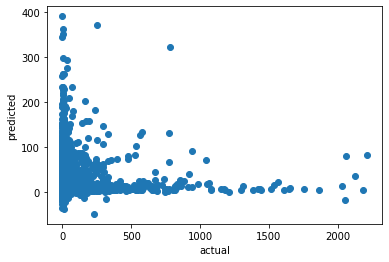

In [15]:
# 散布図を描画
plt.scatter(test_y, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()